# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
from sklearn.datasets import load_boston

In [2]:
boston_raw = load_boston()

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)

In [5]:
df['MEDV'] = boston_raw.target

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

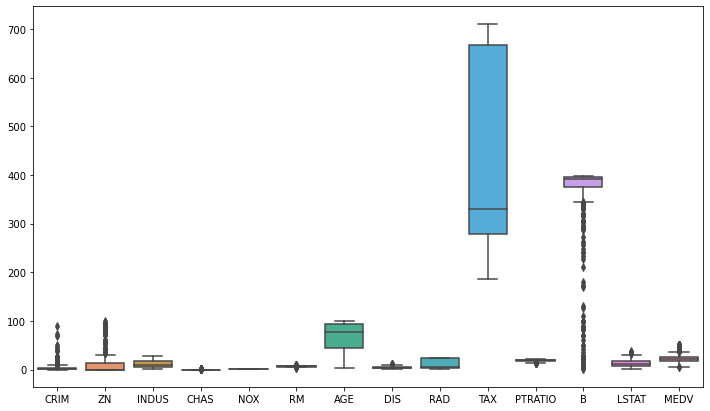

In [7]:
plt.rcParams['figure.figsize'] = (12,7) 
sns.boxplot(data=df)

In [8]:
from sklearn.ensemble import IsolationForest

In [9]:
clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df)
df['Outliers_IsoFor'] = preds

In [10]:
df[df.Outliers_IsoFor == -1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Outliers_IsoFor
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2,-1
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9,-1
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4,-1
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3,-1
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7,-1
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5,-1
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0,-1
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0,-1


In [11]:
(len(df[df.Outliers_IsoFor == -1]) / len(df)) * 100

22.727272727272727

In [12]:
from sklearn.neighbors import LocalOutlierFactor

In [13]:
help(LocalOutlierFactor)

Help on class LocalOutlierFactor in module sklearn.neighbors._lof:

class LocalOutlierFactor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.OutlierMixin, sklearn.neighbors._base.NeighborsBase)
 |  LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)
 |  
 |  Unsupervised Outlier Detection using the Local Outlier Factor (LOF).
 |  
 |  The anomaly score of each sample is called the Local Outlier Factor.
 |  It measures the local deviation of the density of a given sample with respect
 |  to its neighbors.
 |  It is local in that the anomaly score depends on how isolated the object
 |  is with respect to the surrounding neighborhood.
 |  More precisely, locality is given by k-nearest neighbors, whose distance
 |  is used to estimate the local density.
 |  By comparing the local density of a sample to the local densities of its
 |  neighbors, one can identify samples that

In [14]:
lof = LocalOutlierFactor()

In [15]:
df['Outliers_Log'] = lof.fit_predict(df)

In [16]:
len(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)])

19

In [17]:
# In the end, we will combine the results of both outlier methods,
# and drop only the rows that are labeled as such by both of them,
# because detecting outliers individually lead us to drop too many rows

In [18]:
rows_outliers = list(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)].index)

In [19]:
df.drop(rows_outliers,axis=0,inplace=True)

In [20]:
len(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)])

0

In [21]:
# we drop the columns Outliers because we no longer need them

In [22]:
df.drop(['Outliers_Log','Outliers_IsoFor'],axis=1,inplace=True)

In [23]:
df.shape

(487, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

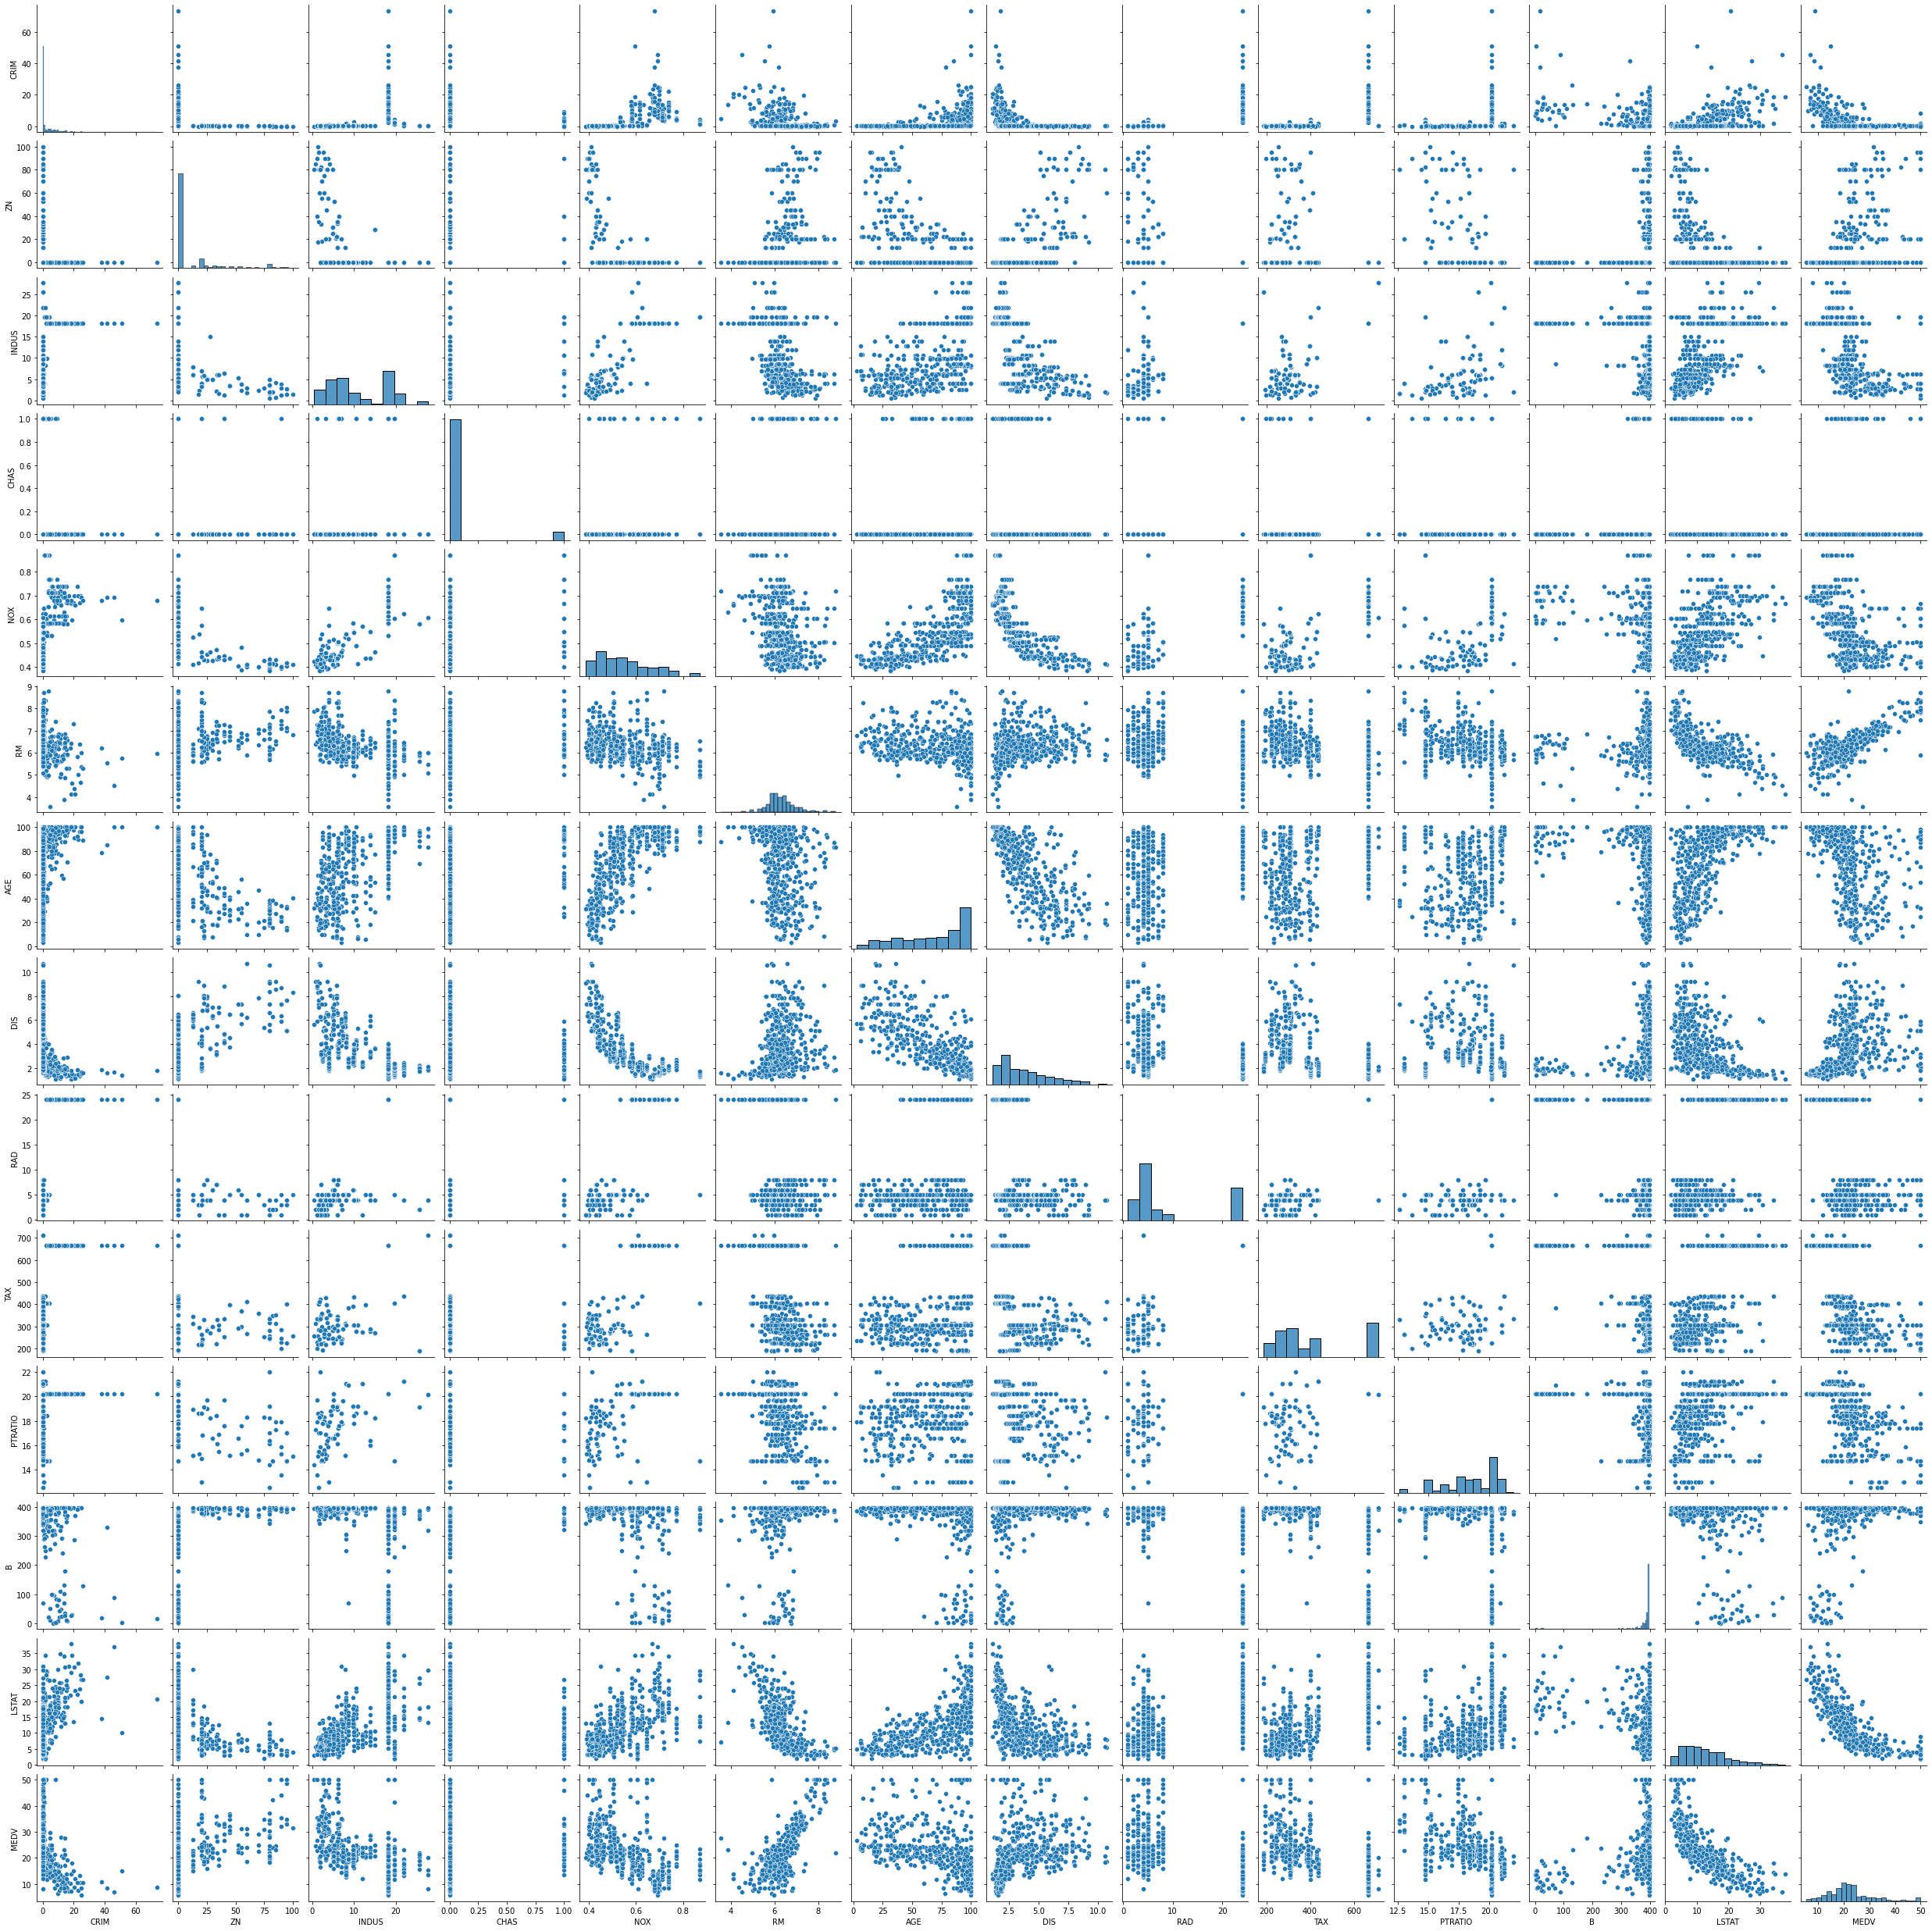

In [24]:
# Your plots here
sns.pairplot(df)

In [25]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.220105,0.455703,-0.063251,0.485478,-0.266819,0.383353,-0.414127,0.689248,0.645416,0.319029,-0.511088,0.520179,-0.430093
ZN,-0.220105,1.000000,-0.528332,-0.034635,-0.518098,0.314117,-0.570213,0.651475,-0.311406,-0.310335,-0.416315,0.167568,-0.420483,0.386360
INDUS,0.455703,-0.528332,1.000000,0.048505,0.763332,-0.387090,0.634785,-0.699500,0.606689,0.720882,0.416063,-0.347018,0.622162,-0.520151
CHAS,-0.063251,-0.034635,0.048505,1.000000,0.075387,0.079954,0.077646,-0.084851,-0.027444,-0.057065,-0.130149,0.065573,-0.033591,0.148753
NOX,0.485478,-0.518098,0.763332,0.075387,1.000000,-0.297032,0.734303,-0.774779,0.648275,0.693638,0.246553,-0.347986,0.613292,-0.453047
RM,-0.266819,0.314117,-0.387090,0.079954,-0.297032,1.000000,-0.235762,0.195809,-0.217060,-0.291245,-0.375674,0.110503,-0.619157,0.730869
AGE,0.383353,-0.570213,0.634785,0.077646,0.734303,-0.235762,1.000000,-0.747468,0.452256,0.495012,0.278721,-0.264342,0.629517,-0.407852
DIS,-0.414127,0.651475,-0.699500,-0.084851,-0.774779,0.195809,-0.747468,1.000000,-0.495240,-0.525848,-0.251457,0.284130,-0.511704,0.274278
RAD,0.689248,-0.311406,0.606689,-0.027444,0.648275,-0.217060,0.452256,-0.495240,1.000000,0.915304,0.460646,-0.488351,0.526443,-0.443316
TAX,0.645416,-0.310335,0.720882,-0.057065,0.693638,-0.291245,0.495012,-0.525848,0.915304,1.000000,0.460748,-0.471866,0.571125,-0.520453


<AxesSubplot:>

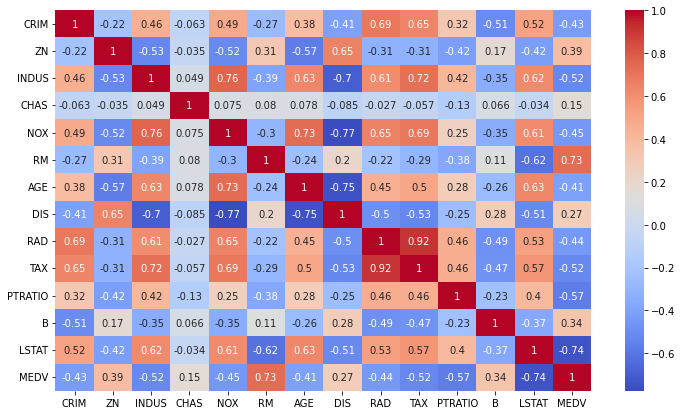

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

In [27]:
# variables that could be of interest: LSTAT, RM and PTRATIO.
# They have mid to strong correlation with MEDV, and low correlation between them

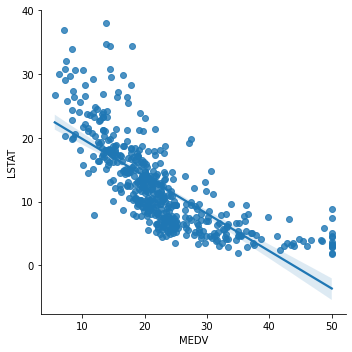

In [28]:
plt.rcParams['figure.figsize'] = (10,6)
sns.lmplot(data=df, x='MEDV', y='LSTAT')

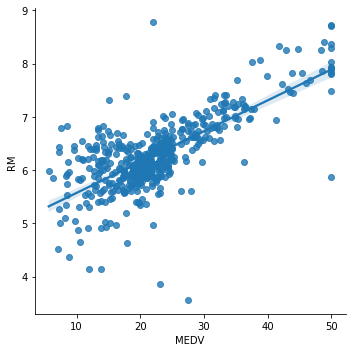

In [29]:
plt.rcParams['figure.figsize'] = (10,6)
sns.lmplot(data=df, x='MEDV', y='RM')

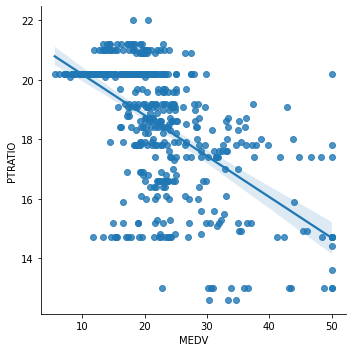

In [30]:
plt.rcParams['figure.figsize'] = (10,6)
sns.lmplot(data=df, x='MEDV', y='PTRATIO')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [31]:
# Your response here
print('For LSTAT and RM plots show strong correlation between them and target variable.\nHowever PTRATIO does not seem so fitted')

For LSTAT and RM plots show strong correlation between them and target variable.
However PTRATIO does not seem so fitted


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

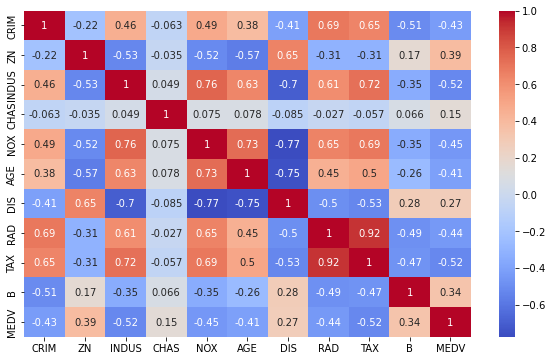

In [32]:
# Your response here
sns.heatmap(df.drop(['LSTAT','RM','PTRATIO'],axis=1).corr(),cmap='coolwarm', annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [33]:
# Your code here
df[['MEDV']].describe()

,MEDV
count,487.000000
mean,22.524641
std,8.868050
min,5.600000
25%,17.200000
50%,21.200000
75%,25.000000
max,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [55]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [35]:
from sklearn.model_selection import train_test_split

In [129]:
X = df.drop('MEDV',axis=1)
y = df.MEDV

In [130]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [131]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

In [132]:
RFR_2 = RandomForestRegressor(max_depth=2)
RFR_4 = RandomForestRegressor(max_depth=4)
RFR_6 = RandomForestRegressor(max_depth=6)
RFR_8 = RandomForestRegressor(max_depth=8)
RFR_10 = RandomForestRegressor(max_depth=10)
models = [RFR_2,RFR_4,RFR_6,RFR_8,RFR_10]

Now, plot the score for each tree on the training set and on the testing set.

In [133]:
# Produce a plot with the score for the testing and training for the different max depths
scores_train = []
scores_test = []
for i in models:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_train)
    scores_train.append(performance_metric(y_train,y_pred))
    i.fit(X_test,y_test)
    y_pred = i.predict(X_test)
    scores_test.append(performance_metric(y_test,y_pred))
    

In [134]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [135]:
# Your response here
scores_train

[0.7847192744667231,
 0.9183527316838731,
 0.9522575713750404,
 0.9711585872761823,
 0.9757427697185215]

In [136]:
scores_test

[0.8694337382723499,
 0.948968472126242,
 0.9740534525239037,
 0.9765777115073202,
 0.9737144465022753]

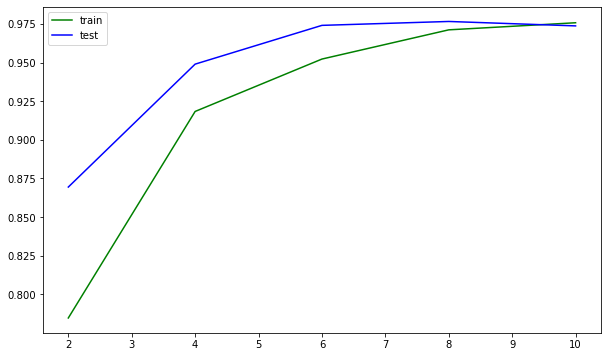

In [137]:
sns.lineplot(y=scores_train,x=[2,4,6,8,10], color='green')
sns.lineplot(y=scores_test,x=[2,4,6,8,10], color='blue')
plt.legend(['train','test'])

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [138]:
# Your response here
RFR_1 = RandomForestRegressor(max_depth=1)

In [139]:
RFR_1.fit(X_train,y_train)
y_pred = RFR_1.predict(X_test)
performance_metric(y_test,y_pred)

0.4289430877089615

In [140]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [146]:
params = {'max_depth': [1,10]}

GridSearch = GridSearchCV(estimator = RandomForestRegressor(), 
                   param_grid = params)

GridSearch.fit(X_train, y_train)
pd.DataFrame(GridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.128514,0.011036,0.009175,0.000162,1,{'max_depth': 1},0.565148,0.358625,0.595571,0.577160,0.52937,0.525175,0.086037,2
1,0.226232,0.011533,0.012500,0.002616,10,{'max_depth': 10},0.847776,0.736873,0.929761,0.919242,0.76811,0.840352,0.077717,1


In [147]:
GridSearch.best_score_

0.8403523980232015

In [148]:
GridSearch.best_estimator_

RandomForestRegressor(max_depth=10)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [153]:
# Your response here
params = {'max_depth': range(1,31)}

GridSearch = GridSearchCV(estimator = RandomForestRegressor(), 
                   param_grid = params)

GridSearch.fit(X_train, y_train)
pd.DataFrame(GridSearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.207332,0.004653,0.009932,0.000167,22,{'max_depth': 22},0.852039,0.737099,0.931738,0.927737,0.779008,0.845524,0.077993,1
29,0.205129,0.000797,0.009866,0.000201,30,{'max_depth': 30},0.847468,0.741473,0.926364,0.927017,0.775994,0.843663,0.075926,2
14,0.204355,0.001995,0.009816,0.000152,15,{'max_depth': 15},0.850725,0.727685,0.928377,0.926834,0.781406,0.843005,0.079333,3
8,0.188468,0.001664,0.009632,0.000134,9,{'max_depth': 9},0.848980,0.731599,0.932663,0.921766,0.775438,0.842089,0.079057,4
12,0.231519,0.027397,0.011096,0.002021,13,{'max_depth': 13},0.850251,0.735403,0.929131,0.926328,0.769232,0.842069,0.079283,5
22,0.204811,0.003292,0.009816,0.000162,23,{'max_depth': 23},0.849223,0.739994,0.929751,0.922320,0.767161,0.841690,0.077730,6
23,0.204246,0.001532,0.010089,0.000493,24,{'max_depth': 24},0.847988,0.735836,0.930649,0.923175,0.767181,0.840966,0.079180,7
17,0.204345,0.001246,0.009998,0.000528,18,{'max_depth': 18},0.851139,0.729566,0.927007,0.923562,0.772485,0.840752,0.079282,8
26,0.205982,0.001815,0.009930,0.000133,27,{'max_depth': 27},0.848747,0.732602,0.927361,0.923778,0.769645,0.840427,0.079007,9
20,0.204754,0.006029,0.010581,0.000815,21,{'max_depth': 21},0.850785,0.730308,0.928294,0.921534,0.770650,0.840314,0.079248,10


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [159]:
# Your response here
print('''
Some variables like B are controversial to say at least nowadays.
Probably more features are needed such as proximity to hospitals, green zones,etc.

''')


Some variables like B are controversial to say at least nowadays.
Probably more features are needed such as proximity to hospitals, green zones,etc.




In [158]:
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu